In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
mc_df = pd.read_json('modcloth_final_data.json', lines  = True)
mc_df.head(5)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [3]:
mc_df.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [4]:
mc_df.shape

(82790, 18)

In [5]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [6]:
missing_data = pd.DataFrame({'total_missing': mc_df.isnull().sum(), 'perc_missing': (mc_df.isnull().sum()/82790)*100})
md =  missing_data.reset_index()
md.sort_values(md.columns[0], ascending = True)

,index,total_missing,perc_missing
6,bra size,6018,7.268994
8,bust,70936,85.681846
7,category,0,0.000000
4,cup size,6255,7.555260
12,fit,0,0.000000
9,height,1107,1.337118
5,hips,26726,32.281677
0,item_id,0,0.000000
11,length,35,0.042276
3,quality,68,0.082136


In [7]:
mc_df.sort_index(ascending = True, axis = 1, inplace = True)
mc_df

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,36.0,NaN,outerwear,b,fit,5ft 8in,NaN,807722,just right,4.0,Cute jacket!,Cute jacket!,8.5,average,8,727820,Jennifer,NaN
82786,34.0,NaN,outerwear,ddd/f,small,5ft 5in,NaN,807722,slightly long,5.0,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,NaN,NaN,12,197040,Kelli,NaN
82787,32.0,NaN,outerwear,dddd/g,fit,5ft 4in,36.0,807722,just right,5.0,I love this blazer. It is,I love this blazer. It is a great office piece...,NaN,NaN,12,102493,elacount,NaN
82788,NaN,NaN,outerwear,NaN,fit,5ft 3in,NaN,807722,just right,4.0,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,NaN,NaN,12,756491,jennaklinner,NaN


In [8]:
mc_df.describe()

,bra size,hips,item_id,quality,shoe size,size,user_id,waist
count,76772.000000,56064.000000,82790.000000,82722.000000,27915.000000,82790.000000,82790.000000,2882.000000
mean,35.972125,40.358501,469325.229170,3.949058,8.145818,12.661602,498849.564718,31.319223
std,3.224907,5.827166,213999.803314,0.992783,1.336109,8.271952,286356.969459,5.302849
min,28.000000,30.000000,123373.000000,1.000000,5.000000,0.000000,6.000000,20.000000
25%,34.000000,36.000000,314980.000000,3.000000,7.000000,8.000000,252897.750000,28.000000
50%,36.000000,39.000000,454030.000000,4.000000,8.000000,12.000000,497913.500000,30.000000
75%,38.000000,43.000000,658440.000000,5.000000,9.000000,15.000000,744745.250000,34.000000
max,48.000000,60.000000,807722.000000,5.000000,38.000000,38.000000,999972.000000,50.000000


In [9]:
def plot_boxplot(kolom, dataset):
    plt.figure(figsize = (18,9))
    sns.boxplot(x = kolom, data = dataset)
    plt.show()

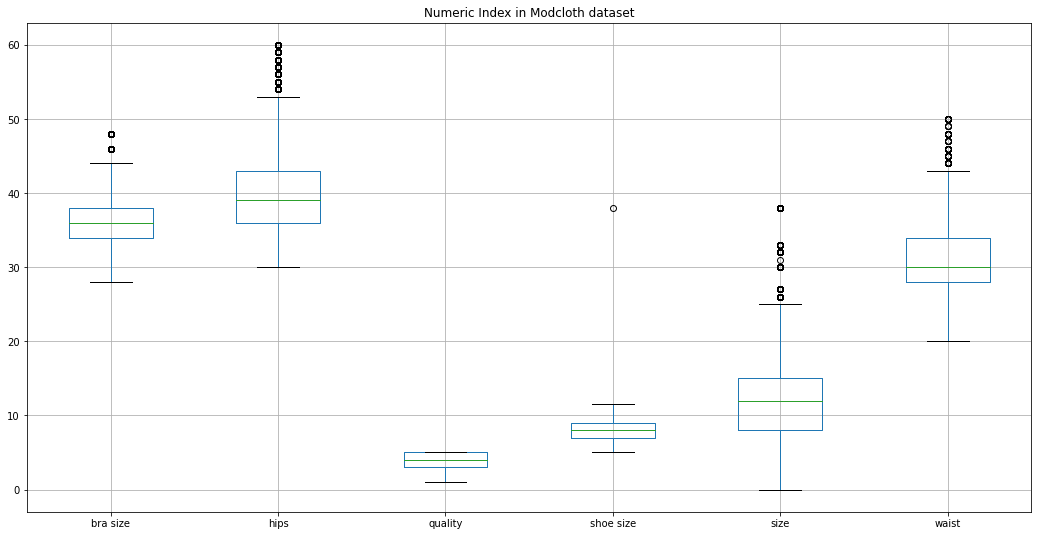

In [10]:
vis_cols = ['bra size', 'hips', 'quality', 'shoe size', 'size', 'waist']
plt.figure(figsize=(18,9))
mc_df[vis_cols].boxplot()
plt.title("Numeric Index in Modcloth dataset")
plt.show()

In [11]:
mc_df[mc_df['shoe size'] == 38]

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
37313,36.0,37-39,new,d,fit,5ft 5in,46.0,416942,just right,5.0,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr...",38.0,average,12,237498,Catslittle,35.0


In [12]:
mc_df.at[37313, 'shoe size'] = None

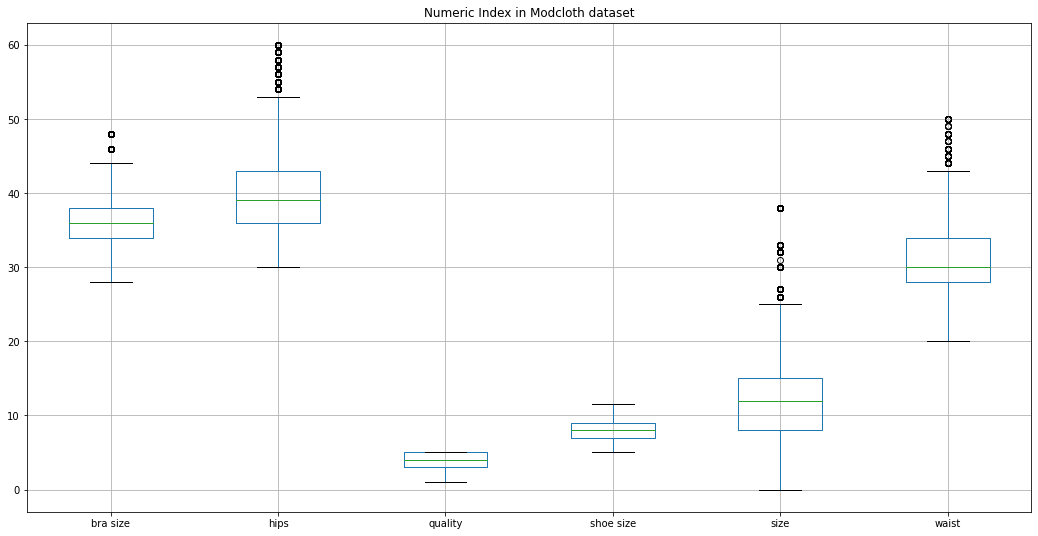

In [13]:
vis_cols = ['bra size', 'hips', 'quality', 'shoe size', 'size', 'waist']
plt.figure(figsize=(18,9))
mc_df[vis_cols].boxplot()
plt.title("Numeric Index in Modcloth dataset")
plt.show()

In [14]:
mc_df.sort_values(by = 'bra size', ascending = False).head(10)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
73118,48.0,NaN,bottoms,dd/e,large,5ft 4in,NaN,753429,slightly long,3.0,I probably should have or,"I probably should have ordered a size down, bu...",NaN,NaN,38,93792,Mikki,NaN
80713,48.0,NaN,outerwear,k,small,7ft 11in,60.0,796383,just right,4.0,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ...",11.5,average,12,810539,bandnerd2522,NaN
28901,48.0,NaN,new,dd/e,fit,5ft 7in,58.0,401773,just right,4.0,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...,NaN,NaN,38,59963,barretts4jesus,NaN
71407,48.0,NaN,bottoms,k,fit,7ft 11in,60.0,726492,slightly short,3.0,The pattern is just as lo,"The pattern is just as lovely in person, as in...",11.5,average,15,708288,bandnerd2522,NaN
38125,48.0,NaN,new,d,large,5ft 9in,35.0,417269,just right,3.0,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...,NaN,NaN,38,308819,Susan,NaN
57273,48.0,NaN,tops,ddd/f,fit,5ft,55.0,645822,just right,5.0,I wear this almost every,I wear this almost every single day! Yay! Some...,NaN,NaN,32,732268,Lillie,NaN
14033,48.0,NaN,dresses,c,small,5ft 8in,NaN,171125,just right,3.0,So I really wanted to lov,So I really wanted to love this dress. I'm a ...,NaN,NaN,38,416697,dillsyrpickle,NaN
28845,48.0,50,new,b,fit,5ft 6in,55.0,401773,just right,3.0,These cardigans are a gre,These cardigans are a great way to achieve tha...,9.5,wide,26,340392,Michelle,NaN
22637,48.0,NaN,dresses,b,fit,5ft 2in,NaN,353933,slightly long,5.0,No negatives to this dres,"No negatives to this dress, it's absolutely go...",NaN,NaN,38,175295,Meghan,NaN
38063,48.0,NaN,new,c,fit,5ft 6in,NaN,417269,very long,4.0,"I love the fabric, I love","I love the fabric, I love long tops, this one ...",NaN,NaN,38,799178,Bea,NaN


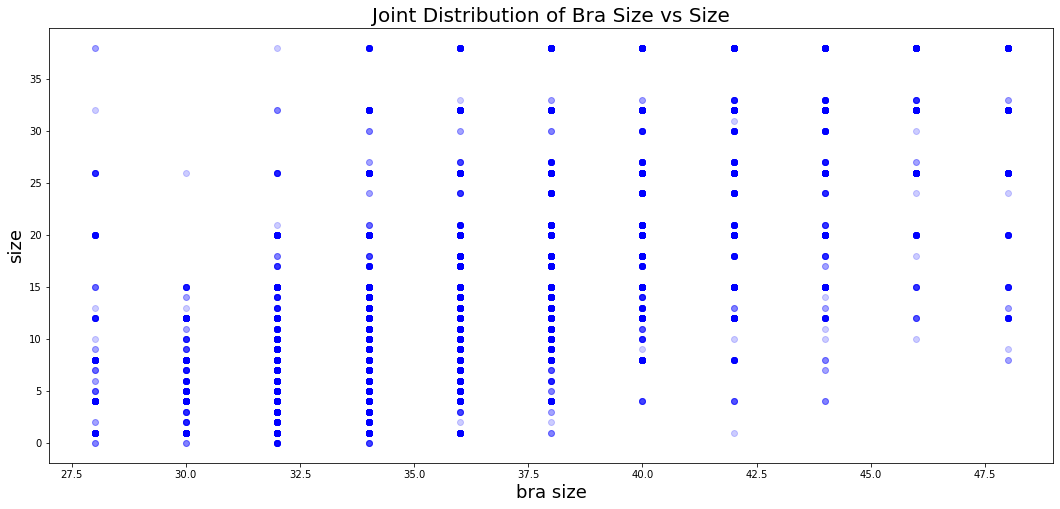

In [15]:
plt.figure(figsize=(18,8))
plt.xlabel('bra size', fontsize = 18)
plt.ylabel('size', fontsize = 18)
plt.title('Joint Distribution of Bra Size vs Size', fontsize = 20)
plt.plot(mc_df['bra size'], mc_df['size'], 'bo', alpha =0.2)
plt.show()

In [16]:
def plot_dist(col, ax):
    mc_df[col][mc_df[col].notnull()].value_counts().plot(kind = 'bar', facecolor = 'y', ax = ax)
    ax.set_xlabel('{}'.format(col), fontsize = 20)
    ax.set_title('{}'.format(col), fontsize = 20)
    return ax

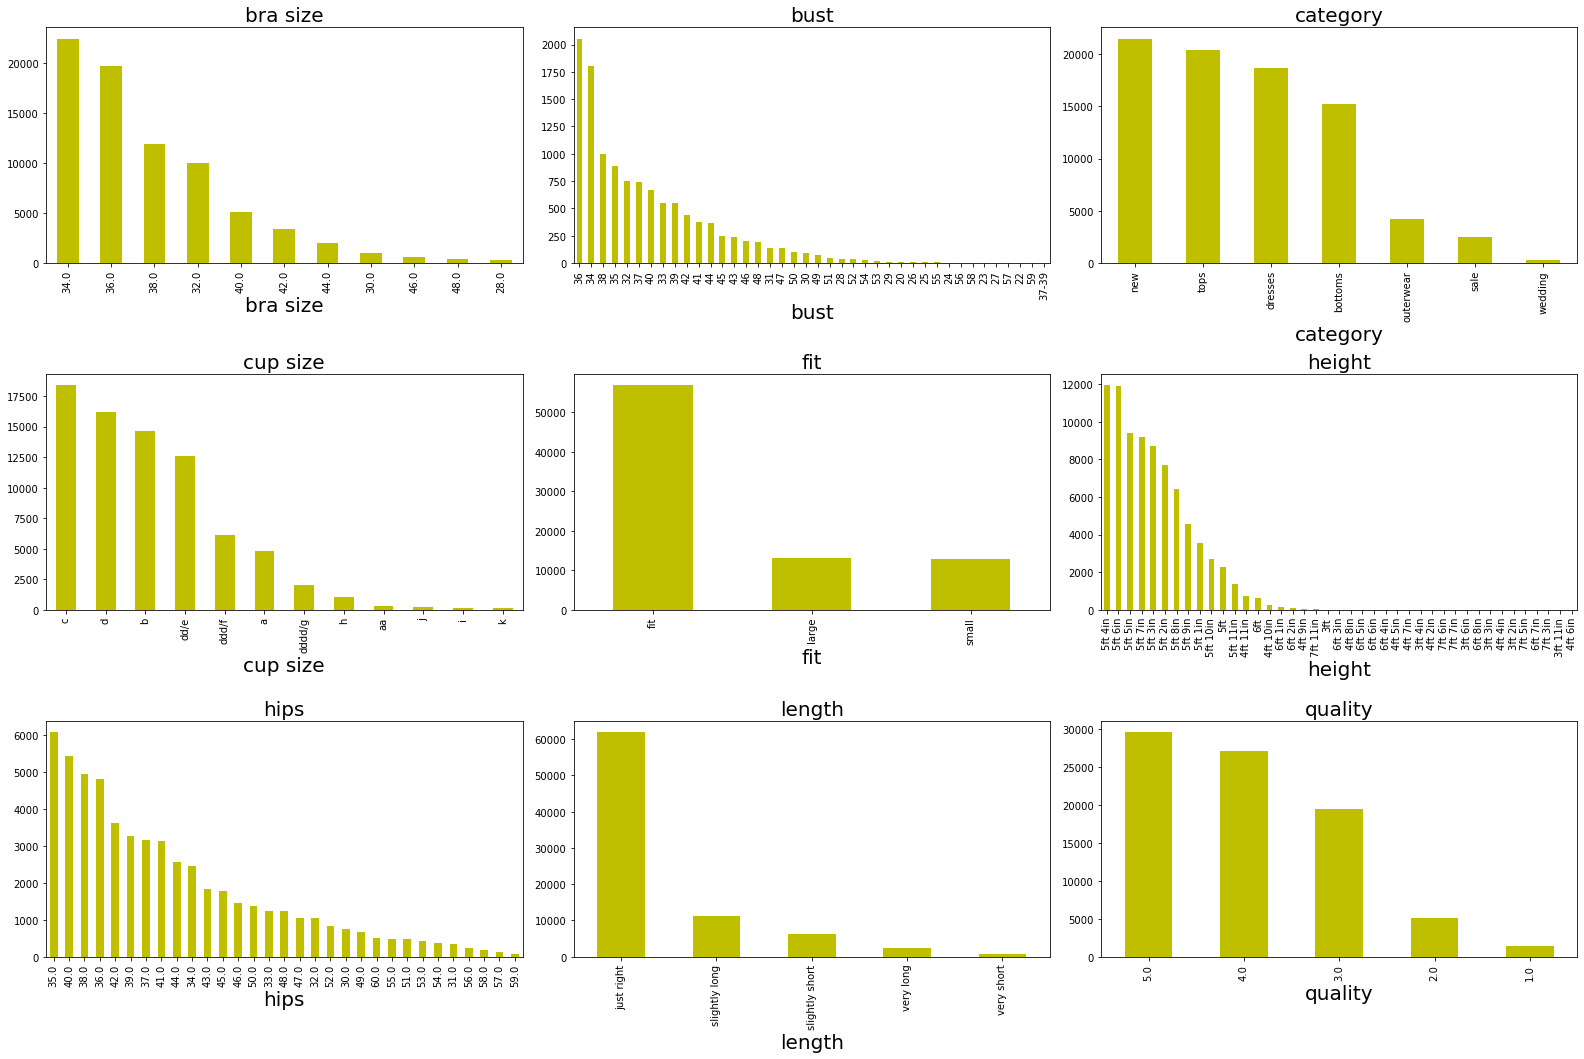

In [17]:
figure, ax = plt.subplots(3,3, figsize = (22,15))
figure.tight_layout(h_pad = 9, w_pad = 2, rect = [0, 0.03, 1, 0.93])
cols = ['bra size', 'bust','category','cup size', 'fit', 'height', 'hips', 'length','quality']

k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k +=1

In [18]:
mc_df['bra size'] = mc_df['bra size'].fillna('Unknown')
mc_df['bra size'] = mc_df['bra size'].astype('category').cat.as_ordered()
mc_df.at[37313, 'bust'] = '38'
mc_df['bust'] = mc_df.bust.fillna(0).astype(int)
mc_df['category'] = mc_df['category'].astype('category')

In [19]:
mc_df[mc_df['cup size'].isnull()].head(20)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
61,Unknown,0,new,NaN,fit,5ft 3in,NaN,124024,just right,5.0,NaN,NaN,NaN,NaN,9,277450,cdpase,NaN
70,Unknown,0,new,NaN,fit,5ft 9in,NaN,124124,slightly long,5.0,NaN,NaN,NaN,NaN,26,29730,inevitable.cities,NaN
72,Unknown,0,new,NaN,fit,5ft 9in,NaN,124124,slightly short,3.0,NaN,NaN,NaN,NaN,26,497767,Josephine,NaN
99,Unknown,0,new,NaN,small,5ft 7in,NaN,124124,very short,1.0,NaN,NaN,NaN,NaN,12,435872,christine.koch,NaN
101,Unknown,0,new,NaN,small,5ft 2in,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,15,788667,meghanmurphy,NaN
107,Unknown,0,new,NaN,small,5ft 5in,NaN,124124,slightly short,4.0,NaN,NaN,NaN,NaN,38,737821,candlecrazy80,NaN
122,Unknown,0,new,NaN,fit,5ft 4in,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,730931,nsulliv5,NaN
145,Unknown,0,new,NaN,fit,5ft 4in,NaN,124124,slightly short,4.0,NaN,NaN,NaN,NaN,12,134273,Amanda,NaN
161,Unknown,0,new,NaN,fit,5ft 11in,NaN,124124,slightly short,3.0,NaN,NaN,NaN,NaN,8,666485,nativenrg,NaN
184,Unknown,0,new,NaN,small,5ft 2in,NaN,124124,slightly short,1.0,NaN,NaN,NaN,NaN,12,971224,sn.johnson08,NaN


In [20]:
mc_df['cup size'].fillna('Unknown', inplace = True)
mc_df['cup size'] = mc_df['cup size'].astype('category').cat.as_ordered()


In [21]:
mc_df.fit = mc_df.fit.astype('category') #fit is columns
mc_df[mc_df['height'].isnull()].sample(20)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
59549,32,0,bottoms,a,large,NaN,NaN,654585,just right,5.0,This is a great skirt! Th,This is a great skirt! The waist is slightly l...,NaN,NaN,1,750701,sendohsan,NaN
2569,34,0,new,ddd/f,fit,NaN,NaN,136482,just right,3.0,NaN,NaN,NaN,NaN,26,949960,foxymskarisa,NaN
47955,Unknown,0,tops,Unknown,fit,NaN,NaN,517055,just right,5.0,Fave tee to lounge in and,Fave tee to lounge in and it's dressy enough f...,7.5,NaN,12,437169,mikozenmiko,NaN
30338,36,0,new,dd/e,fit,NaN,NaN,406357,just right,5.0,Love this so much. The c,Love this so much. The colour goes perfectly ...,NaN,NaN,12,349620,Laura,NaN
36315,34,0,new,ddd/f,large,NaN,40.0,414857,just right,3.0,????????????????,????????????????,NaN,NaN,20,314086,renyukoken0000,NaN
45480,30,0,tops,d,fit,NaN,60.0,486643,just right,3.0,Comfortable fabric perfec,Comfortable fabric perfect for going from the ...,NaN,NaN,12,905337,emmyrosehobbs,NaN
1213,38,0,new,dddd/g,fit,NaN,NaN,126885,just right,5.0,NaN,NaN,NaN,NaN,26,212900,joannao,NaN
71259,Unknown,0,bottoms,Unknown,fit,NaN,33.0,726492,just right,2.0,I have gotten a lot of co,I have gotten a lot of compliments for this sk...,NaN,NaN,4,119514,marilille,NaN
38789,Unknown,0,tops,Unknown,fit,NaN,60.0,423572,just right,5.0,this was ideal for me...,this was ideal for me... being a bigger girl i...,NaN,NaN,32,331024,amyyoung50,NaN
9584,40,0,dresses,dd/e,fit,NaN,NaN,161592,just right,4.0,I was extremely worried a,I was extremely worried about this purchase. I...,NaN,NaN,30,694825,Emily,NaN


In [22]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    
    try:
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return(int(x[0]) * 30.48)

mc_df['height'] = mc_df['height'].apply(get_cms)

In [23]:
mc_df[mc_df.height.isnull()].head(20)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
3,Unknown,0,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
17,36,0,new,dddd/g,large,NaN,NaN,123373,just right,4.0,NaN,NaN,NaN,NaN,15,128353,Megan,NaN
43,36,0,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,15,670919,sdhewey,NaN
73,38,0,new,c,large,NaN,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,816504,Fiorella,NaN
131,36,0,new,c,fit,NaN,NaN,124124,very short,3.0,NaN,NaN,NaN,NaN,12,846091,jmcrowder.1124,NaN
213,40,0,new,d,fit,NaN,NaN,124124,just right,4.0,NaN,NaN,NaN,NaN,20,121007,rhea_heather,NaN
382,34,0,new,b,large,NaN,NaN,125442,just right,5.0,NaN,NaN,NaN,NaN,5,5752,kelsi.flatland,NaN
423,34,0,new,c,fit,NaN,NaN,125442,just right,5.0,NaN,NaN,NaN,NaN,7,563612,Naomi,NaN
456,38,0,new,b,fit,NaN,NaN,125442,just right,5.0,NaN,NaN,NaN,NaN,7,968605,shirawzn,NaN
475,30,0,new,dd/e,small,NaN,36.0,125442,just right,5.0,NaN,NaN,NaN,NaN,7,940714,Ingrid,NaN


In [24]:
#columns_nan = ['height', 'hips', 'shoe size', 'shoe width', 'waist']
#1
mc_df[((mc_df['bra size'] != 'Unknown') | (mc_df['cup size'] != 'Unknown')) 
     & (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) & (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()) & 
    (mc_df['waist'].isnull())].head(3)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
3,Unknown,0,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
17,36,0,new,dddd/g,large,NaN,NaN,123373,just right,4.0,NaN,NaN,NaN,NaN,15,128353,Megan,NaN
43,36,0,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,15,670919,sdhewey,NaN


In [25]:
#2
mc_df[((mc_df['shoe size'].notnull()) | (mc_df['shoe width'].notnull())) 
      & (mc_df['bra size'] == 'Unknown') &  (mc_df['cup size'] == 'Unknown') & (mc_df['hips'].isnull())
     & (mc_df['height'].isnull()) & (mc_df['waist'].isnull())].head(3)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
553,Unknown,0,new,Unknown,fit,NaN,NaN,125442,slightly long,5.0,NaN,NaN,7.0,average,7,461540,sharonpeporter,NaN
591,Unknown,0,new,Unknown,small,NaN,NaN,125442,slightly short,3.0,NaN,NaN,8.5,narrow,7,675878,julia.burch,NaN
665,Unknown,0,new,Unknown,fit,NaN,NaN,125442,slightly short,5.0,NaN,NaN,9.5,wide,7,131784,Kate,NaN


In [26]:
#3
mc_df[((mc_df['hips'].notnull()) | (mc_df['waist'].notnull())) 
      & (mc_df['bra size'] == 'Unknown') &  (mc_df['cup size'] == 'Unknown') & (mc_df['shoe size'].isnull())
     & (mc_df['height'].isnull()) & (mc_df['shoe width'].isnull())].head(3)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
2364,Unknown,0,new,Unknown,fit,NaN,39.0,131020,just right,5.0,NaN,NaN,NaN,NaN,11,259712,aislinnalysse,NaN
3568,Unknown,38,new,Unknown,fit,NaN,41.0,143287,just right,5.0,NaN,NaN,NaN,NaN,12,300915,a.stahle,NaN
8714,Unknown,0,dresses,Unknown,fit,NaN,58.0,161514,just right,5.0,I wore this dress when I,I wore this dress when I was in a friend's wed...,NaN,NaN,26,817544,foxlindseyfox,NaN


In [27]:
#1
lingerie_cond = (((mc_df['bra size'] != 'Unknown') | (mc_df['cup size'] != 'Unknown')) 
     & (mc_df['height'].isnull()) & (mc_df['hips'].isnull()) & (mc_df['shoe size'].isnull()) & (mc_df['shoe width'].isnull()) & 
    (mc_df['waist'].isnull()))

#2
shoes_cond = (((mc_df['shoe size'].notnull()) | (mc_df['shoe width'].notnull())) 
      & (mc_df['bra size'] == 'Unknown') &  (mc_df['cup size'] == 'Unknown') & (mc_df['hips'].isnull())
     & (mc_df['height'].isnull()) & (mc_df['waist'].isnull()))

#3
dress_tops_cond = (((mc_df['hips'].notnull()) | (mc_df['waist'].notnull())) 
      & (mc_df['bra size'] == 'Unknown') &  (mc_df['cup size'] == 'Unknown') & (mc_df['shoe size'].isnull())
     & (mc_df['height'].isnull()) & (mc_df['shoe width'].isnull()))

In [28]:
print(len(lingerie_cond))

82790


In [29]:
print(len(shoes_cond))

82790


In [30]:
print(len(dress_tops_cond))

82790


In [31]:
valuess = (lingerie_cond | shoes_cond |dress_tops_cond)
mc_df['first_time_user'] = valuess

In [32]:
print("Total transactions by first time users who bought bra, shoes, or a dress  : " + str(sum(mc_df['first_time_user'])))

Total transactions by first time users who bought bra, shoes, or a dress  : 903


In [33]:
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoes_cond | dress_tops_cond)].user_id.unique())))

Total first time users: 565


In [34]:
#Handling length missing values
missing_rows = mc_df[mc_df['length'].isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace = True)

In [35]:
mc_df.hips

0        38.0
1        30.0
2         NaN
3         NaN
4         NaN
         ... 
82785     NaN
82786     NaN
82787    36.0
82788     NaN
82789    39.0
Name: hips, Length: 82755, dtype: float64

In [37]:
#Handling hips columns
mc_df['hips'] = mc_df['hips'].fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)

In [38]:
mc_df.hips

0              M
1             XS
2        Unknown
3        Unknown
4        Unknown
          ...   
82785    Unknown
82786    Unknown
82787          S
82788    Unknown
82789          M
Name: hips, Length: 82755, dtype: category
Categories (6, object): ['Unknown' < 'XS' < 'S' < 'M' < 'L' < 'XL']

In [39]:
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

In [41]:
mc_df.sample(25)

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist,first_time_user
43709,30,0,tops,dddd/g,fit,167.64,L,478122,just right,5.0,perfect..,perfect..,NaN,NaN,8,508836,lissa.gunvald,NaN,False
73032,38,0,bottoms,c,large,167.64,XL,753429,slightly long,4.0,These leggings are just w,These leggings are just what I was hoping for!...,NaN,NaN,26,925417,Sam,NaN,False
3455,32,0,new,b,small,180.34,S,141850,slightly short,3.0,NaN,NaN,NaN,NaN,4,846880,Laurel,NaN,False
1354,36,0,new,b,fit,167.64,S,126885,slightly long,4.0,NaN,NaN,NaN,NaN,1,697662,kristin,NaN,False
82733,32,0,outerwear,dd/e,fit,160.02,Unknown,807384,just right,5.0,This is the perfect coat.,This is the perfect coat. It's actually better...,NaN,NaN,8,516754,Rachel,NaN,False
56955,34,34,tops,dd/e,fit,165.10,L,645822,just right,4.0,These cropped sweaters ar,These cropped sweaters are fantastic for pairi...,7.5,wide,12,993279,Jillian,NaN,False
72509,30,35,bottoms,dd/e,fit,162.56,S,752094,very long,4.0,Very flattering skirt. Th,"Very flattering skirt. The small was perfect, ...",NaN,NaN,4,349048,ejschecter,NaN,False
18621,Unknown,0,dresses,Unknown,fit,165.10,Unknown,228276,just right,5.0,Adorable! Fits perfectly,Adorable! Fits perfectly and so cute with boot...,NaN,NaN,1,217999,amebrew,NaN,False
33595,32,0,new,d,fit,172.72,M,411494,slightly long,2.0,I wore this as a maternit,I wore this as a maternity top. Lots of stretc...,NaN,NaN,8,248386,amy.teall,NaN,False
65644,36,0,bottoms,d,fit,162.56,L,693560,just right,4.0,I have few of these skirt,"I have few of these skirts, I found this one i...",NaN,NaN,4,113594,Celeste,NaN,False


In [42]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82697 entries, 0 to 82789
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bra size         82697 non-null  category
 1   bust             82697 non-null  int32   
 2   category         82697 non-null  category
 3   cup size         82697 non-null  category
 4   fit              82697 non-null  category
 5   height           81594 non-null  float64 
 6   hips             82697 non-null  category
 7   item_id          82697 non-null  int64   
 8   length           82697 non-null  object  
 9   quality          82697 non-null  category
 10  review_summary   75976 non-null  object  
 11  review_text      75976 non-null  object  
 12  shoe size        27876 non-null  float64 
 13  shoe width       18581 non-null  object  
 14  size             82697 non-null  int64   
 15  user_id          82697 non-null  int64   
 16  user_name        82697 non-null  object 

In [43]:
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

In [44]:
shoe_widths_type

CategoricalDtype(categories=['Unknown', 'narrow', 'average', 'wide'], ordered=True)

In [47]:
mc_df.review_summary = mc_df.review_summary.fillna('Unknown')
mc_df.review_text = mc_df.review_text.fillna('Unkown')
mc_df['shoe size'] = mc_df['shoe size'].fillna('Unknown')
mc_df['shoe size'] = mc_df['shoe size'].astype('category').cat.as_ordered()
mc_df['shoe width'] = mc_df['shoe width'].fillna('Unknown')
mc_df['shoe width'] = mc_df['shoe width'].astype(shoe_widths_type)
mc_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = mc_df[mc_df.height.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

In [48]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bra size         81594 non-null  category
 1   category         81594 non-null  category
 2   cup size         81594 non-null  category
 3   fit              81594 non-null  category
 4   height           81594 non-null  float64 
 5   hips             81594 non-null  category
 6   item_id          81594 non-null  int64   
 7   length           81594 non-null  object  
 8   quality          81594 non-null  category
 9   review_summary   81594 non-null  object  
 10  review_text      81594 non-null  object  
 11  shoe size        81594 non-null  category
 12  shoe width       81594 non-null  category
 13  size             81594 non-null  int64   
 14  user_id          81594 non-null  int64   
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int